In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Loading DataSets

In [4]:
fake = pd.read_csv("C:/Users/JYOTHISH/Downloads/Fake.csv/Fake.csv")
true = pd.read_csv("C:/Users/JYOTHISH/Downloads/True.csv/True.csv")

In [5]:
fake.shape

(23481, 4)

In [6]:
true.shape

(21417, 4)

In [7]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [8]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [9]:
#DATA CLEANING and PREPARATION


#Add flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'

fake.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [10]:
#Concatenate dataframes

data = pd.concat([fake,true]).reset_index(drop = True)
data.shape

(44898, 5)

In [11]:
#shuffle the data

from sklearn.utils import shuffle
data = shuffle(data).reset_index(drop=True) #shuffle the data and reset index by dropping previous and assigning new asper order.
# data = data.reset_index(drop=True)

In [12]:
# Check the DataFrame data

data.head()

,title,text,subject,date,target
0,WOW! WOMAN TOTALLY FREAKS OUT At Sight Of Conf...,WHAT NOT TO DO IS PRETTY MUCH EVERYTHING THIS ...,left-news,"May 15, 2017",fake
1,Tillerson tells Myanmar army chief U.S. concer...,WASHINGTON (Reuters) - U.S. Secretary of State...,worldnews,"October 27, 2017",true
2,BILL O’REILLY IS BACK! Tell Fans He’s Not Goin...,Bill O Reilly is back! And if you listen to hi...,left-news,"Apr 24, 2017",fake
3,Trump’s Team Is So Incompetent They Couldn’t ...,Donald Trump promised to surround himself with...,News,"July 6, 2017",fake
4,STATUE OF LIBERTY AS A MUSLIM? Congressman Spa...,Here we go again another student art contest t...,left-news,"Aug 6, 2017",fake


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [14]:
# Removing the date column

data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,WOW! WOMAN TOTALLY FREAKS OUT At Sight Of Conf...,WHAT NOT TO DO IS PRETTY MUCH EVERYTHING THIS ...,left-news,fake
1,Tillerson tells Myanmar army chief U.S. concer...,WASHINGTON (Reuters) - U.S. Secretary of State...,worldnews,true
2,BILL O’REILLY IS BACK! Tell Fans He’s Not Goin...,Bill O Reilly is back! And if you listen to hi...,left-news,fake
3,Trump’s Team Is So Incompetent They Couldn’t ...,Donald Trump promised to surround himself with...,News,fake
4,STATUE OF LIBERTY AS A MUSLIM? Congressman Spa...,Here we go again another student art contest t...,left-news,fake


In [15]:
# Removing the title Column

data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,WHAT NOT TO DO IS PRETTY MUCH EVERYTHING THIS ...,left-news,fake
1,WASHINGTON (Reuters) - U.S. Secretary of State...,worldnews,true
2,Bill O Reilly is back! And if you listen to hi...,left-news,fake
3,Donald Trump promised to surround himself with...,News,fake
4,Here we go again another student art contest t...,left-news,fake


In [16]:
# Convert to lowercase

data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,what not to do is pretty much everything this ...,left-news,fake
1,washington (reuters) - u.s. secretary of state...,worldnews,true
2,bill o reilly is back! and if you listen to hi...,left-news,fake
3,donald trump promised to surround himself with...,News,fake
4,here we go again another student art contest t...,left-news,fake


In [17]:
# Remove the Punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [18]:
# Checking

data.head()

,text,subject,target
0,what not to do is pretty much everything this ...,left-news,fake
1,washington reuters us secretary of state rex ...,worldnews,true
2,bill o reilly is back and if you listen to his...,left-news,fake
3,donald trump promised to surround himself with...,News,fake
4,here we go again another student art contest t...,left-news,fake


In [19]:
# Removing STOPWORDS

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Error loading stopwords: <urlopen error [WinError 10054]
[nltk_data]     An existing connection was forcibly closed by the
[nltk_data]     remote host>


In [20]:
data.head()

,text,subject,target
0,pretty much everything nutjob did1 angrily con...,left-news,fake
1,washington reuters us secretary state rex till...,worldnews,true
2,bill reilly back listen first podcast website ...,left-news,fake
3,donald trump promised surround best people tea...,News,fake
4,go another student art contest brings controve...,left-news,fake


# Basic Data Exploration

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


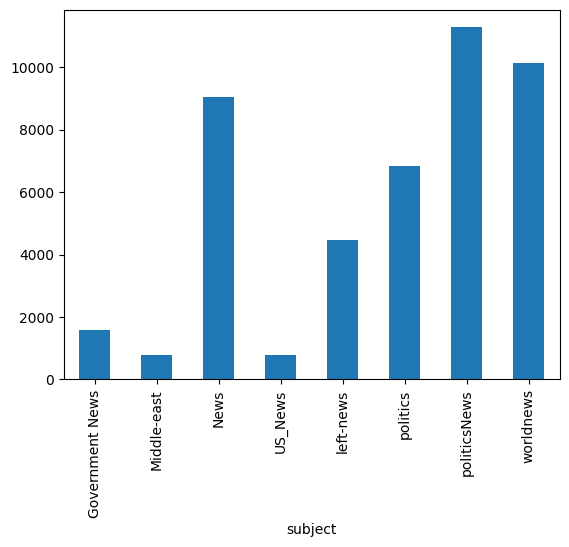

In [21]:
#How many articles per subject?

print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


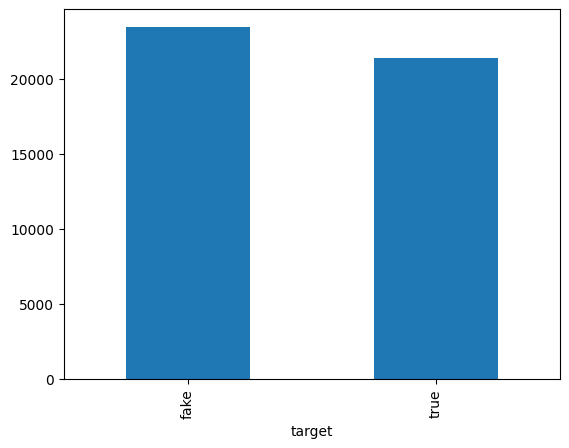

In [22]:
# How many fake and real articles?

print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

In [23]:
!pip install wordcloud


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


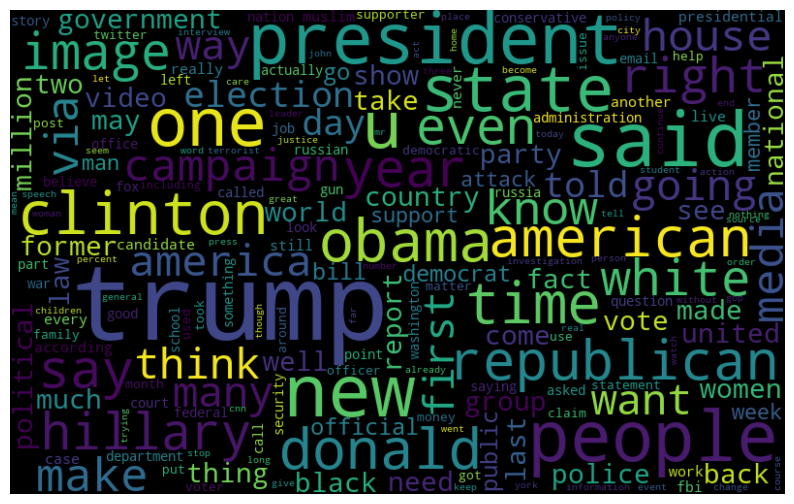

In [24]:
# Word Cloud for Fake News

from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800,height= 500,max_font_size = 110,
                        collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

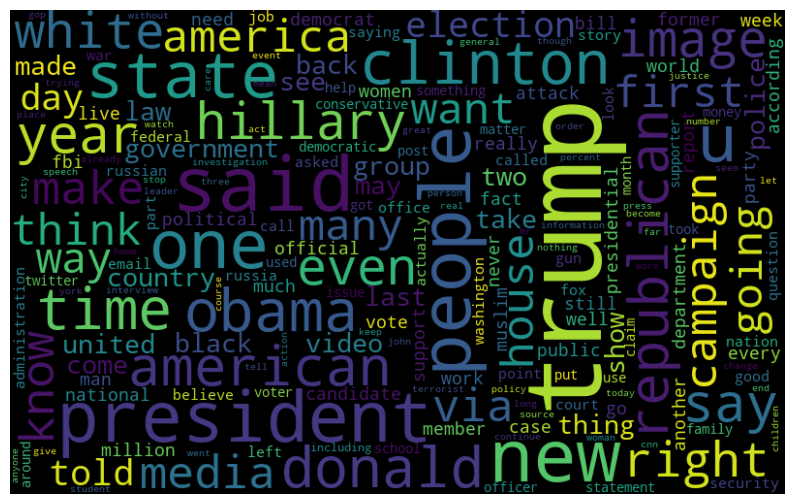

In [25]:
# Word cloud for real news

from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [26]:
# Most frequent words counter

from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

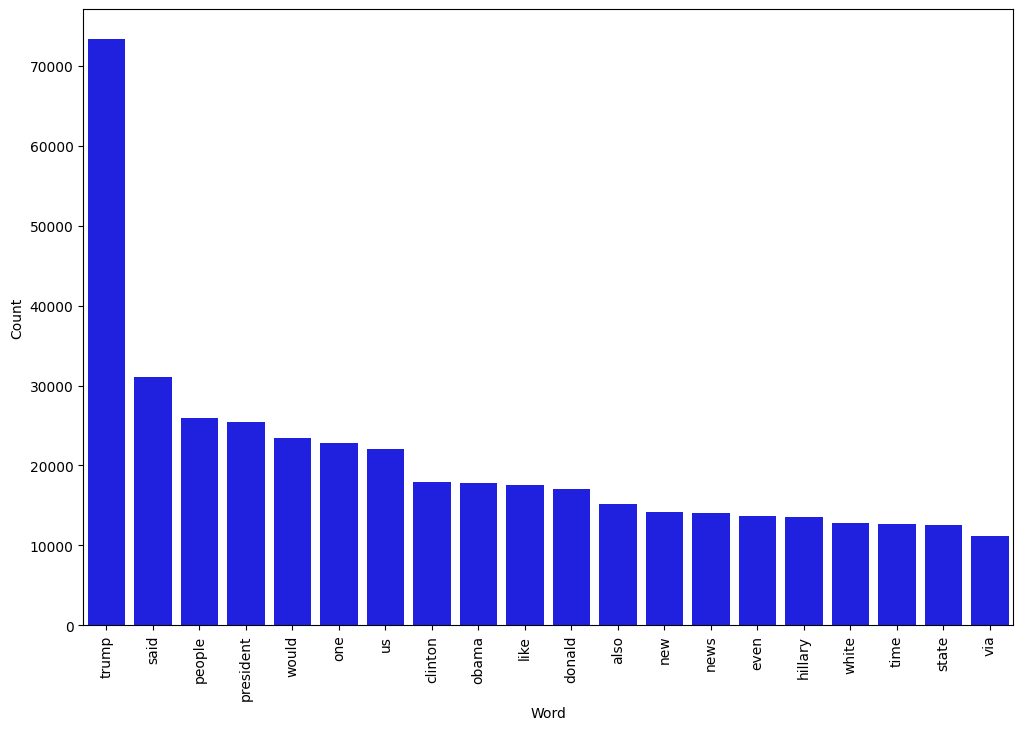

In [27]:
# Most frequent words in fake news

counter(data[data["target"] == "fake"], "text", 20)

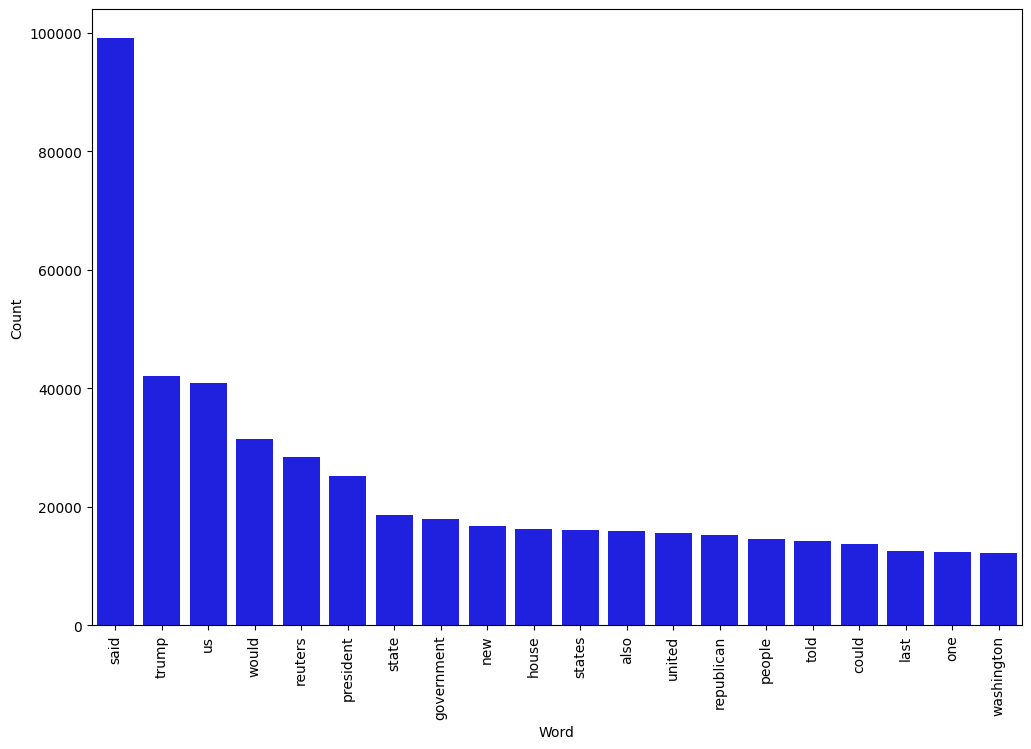

In [28]:
# Most frequent words in real news

counter(data[data["target"] == "true"], "text", 20)

# Modeling

In [29]:
# Function to plot the confusion matrix

from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Split Data

In [30]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

In [31]:
X_train.head()

36335    ted cruz must envisioned campaign would end he...
12384    washington reuters congressional vote republic...
24419    lack compassion families 4 dead americans hill...
24740    harvard law professor emeritus alan dershowitz...
27039    conakry reuters twoday skirmish guinean malian...
Name: text, dtype: object

In [32]:
X_test.head()

22216    winning iowa caucus ted cruz following pattern...
27917    donald trump constantly talks make america gre...
25007    newark nj reuters bribery case us senator bob ...
1377     hillary clinton continued overseas trashing pr...
32476    name michael brown robbed local convenience st...
Name: text, dtype: object

In [33]:
y_train.head()

36335    fake
12384    true
24419    fake
24740    fake
27039    true
Name: target, dtype: object

In [34]:
y_test.head()

22216    fake
27917    fake
25007    true
1377     fake
32476    fake
Name: target, dtype: object

# SVM

In [69]:
from sklearn.svm import LinearSVC

# Vectorizing using TF-IDF
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', LinearSVC(dual=False))])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: {}%".format(round(accuracy * 100, 2)))

# Precision
precision = precision_score(y_test, predictions, average='weighted')
print("Precision: {}%".format(round(precision * 100, 2)))

# Recall
recall = recall_score(y_test, predictions, average='weighted')
print("Recall: {}%".format(round(recall * 100, 2)))

# F1 Score
f1 = f1_score(y_test, predictions, average='weighted')
print("F1 Score: {}%".format(round(f1 * 100, 2)))


Accuracy: 99.69%
Precision: 99.69%
Recall: 99.69%
F1 Score: 99.69%


# Confusion Matrix

Confusion matrix, without normalization


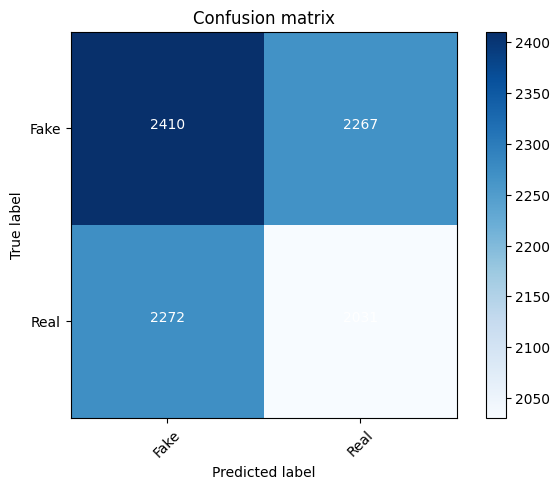

In [70]:
# Plot Confusion Matrix

cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])